In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_excel("C:/Users/Mit/OneDrive/Desktop/python_project/mymovie_data.xlsx")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9828 entries, 0 to 9827
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9828 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   float64       
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 691.2+ KB


In [60]:
df.duplicated().sum()

0

In [61]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9828,9827.000000,9827.000000,9827.000000
mean,2006-09-23 22:30:02.197802240,40.326088,1392.805536,6.439534
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000
25%,2000-10-18 12:00:00,16.128500,146.000000,5.900000
50%,2011-09-13 00:00:00,21.199000,444.000000,6.500000
75%,2017-11-22 06:00:00,35.191500,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.873998,2611.206907,1.129759


#pre processing
#need to delete unnecesarry eliments

In [62]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [63]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


droping columns

In [65]:
cols=['Overview','Poster_Url']

In [66]:
df.drop(cols,axis=1,inplace=True,errors='ignore')

In [67]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre'],
      dtype='object')

In [68]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,6.3,en,Thriller
3,2021,Encanto,2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War"


In [69]:
def catigorise_col(df,col,label):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

In [70]:
labels=['not_popular','below_avg','average','popular']

catigorise_col(df,'Vote_Average',labels)

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [71]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,popular,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,below_avg,en,Thriller
3,2021,Encanto,2402.201,5076.0,popular,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,average,en,"Action, Adventure, Thriller, War"


In [72]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [73]:
df.dropna(inplace=True)

df.isna().sum()

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

In [74]:
df['Genre']=df['Genre'].str.split(',')

df=df.explode('Genre').reset_index(drop=True)

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,en,Crime
4,2022,The Batman,3827.658,1151.0,popular,en,Mystery


#casting columnn into catagory

In [75]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25552 non-null  int32   
 1   Title              25552 non-null  object  
 2   Popularity         25552 non-null  float64 
 3   Vote_Count         25552 non-null  float64 
 4   Vote_Average       25552 non-null  category
 5   Original_Language  25552 non-null  object  
 6   Genre              25552 non-null  category
dtypes: category(2), float64(2), int32(1), object(2)
memory usage: 949.9+ KB


In [77]:
df.nunique()

Release_Date          100
Title                9415
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                  38
dtype: int64

In [78]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,en,Crime
4,2022,The Batman,3827.658,1151.0,popular,en,Mystery


#Data Visulisation

# What is the most frequent genre of movies released on Netflix?


In [79]:
df['Genre'].describe()

count         25552
unique           38
top        Thriller
freq           1960
Name: Genre, dtype: object

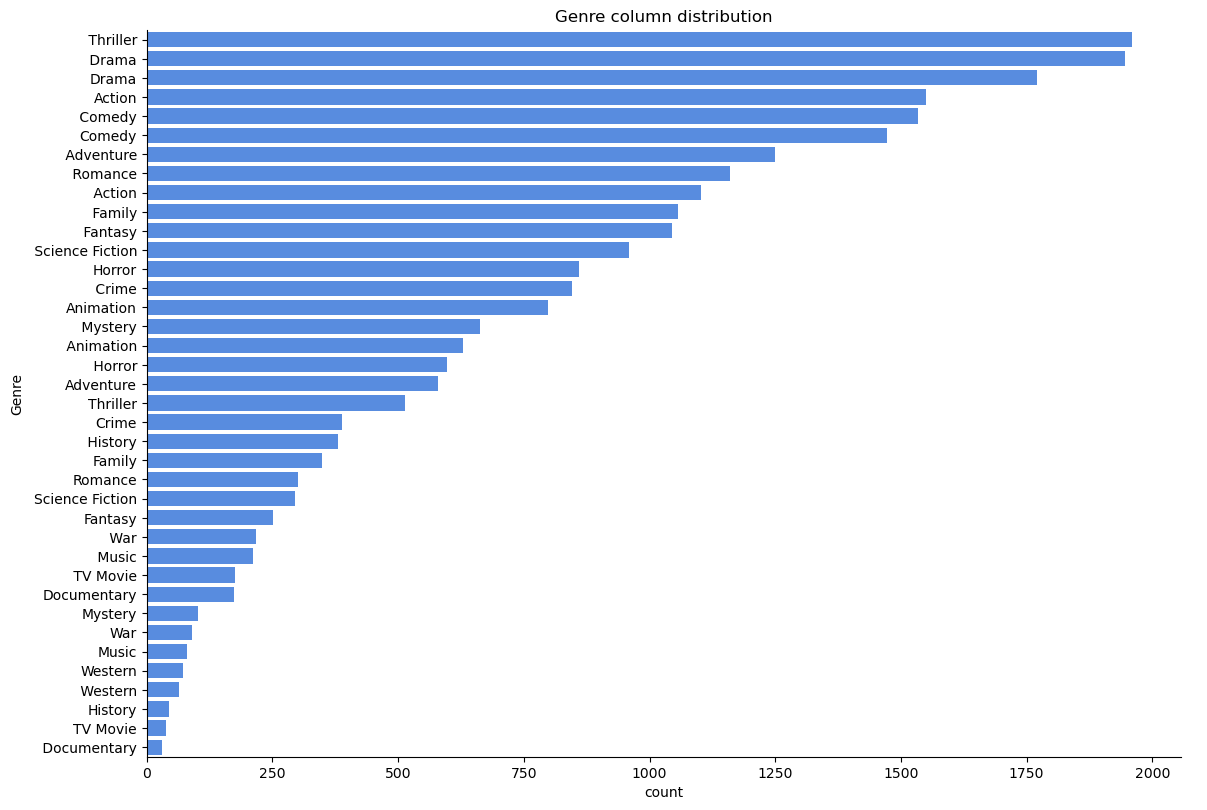

In [80]:
 sns.catplot(y='Genre',data=df,kind='count',
            order=df['Genre'].value_counts().index,
            color='#4287f5',height=8,aspect=1.5)
plt.title('Genre column distribution')
plt.show()

# Which has highest votes in vote avg column?


In [81]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,en,Crime
4,2022,The Batman,3827.658,1151.0,popular,en,Mystery


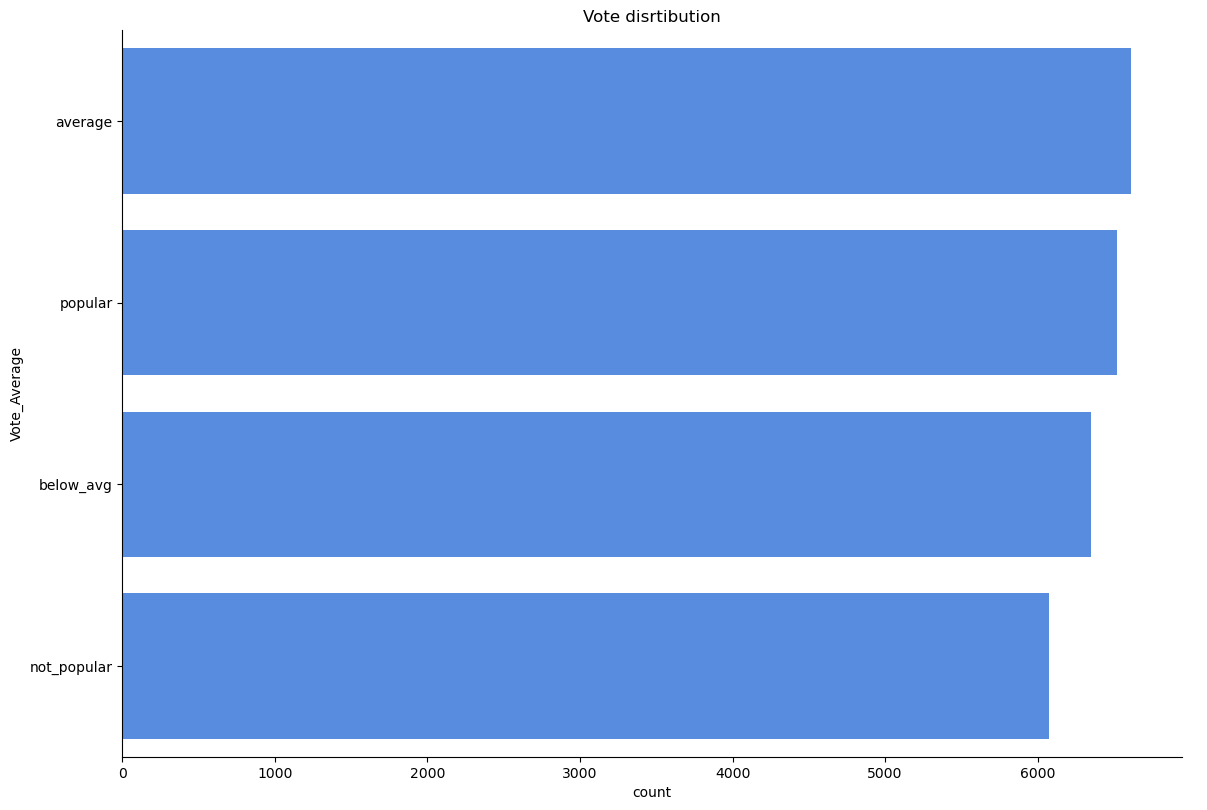

In [82]:
sns.catplot(y='Vote_Average',data=df,kind='count',
          order=df['Vote_Average'].value_counts().index,
           color='#4287f5',height=8,aspect=1.5)
plt.title('Vote disrtibution')
plt.show()

# What movie got the highest popularity? what's its genre?


In [83]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Adventure


In [84]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Science Fiction


# What movie got the lowest popularity? what's its genre?


In [85]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152.0,average,en,Music
25547,2021,The United States vs. Billie Holiday,13.354,152.0,average,en,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152.0,average,en,History
25549,1984,Threads,13.354,186.0,popular,en,War
25550,1984,Threads,13.354,186.0,popular,en,Drama
25551,1984,Threads,13.354,186.0,popular,en,Science Fiction


# Which year has the most filmmed movies?

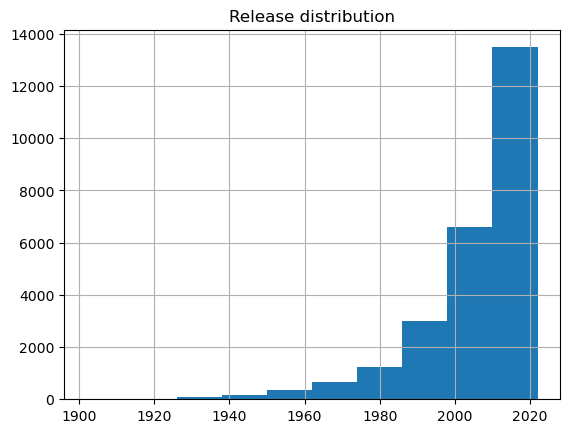

In [88]:
df['Release_Date'].hist()
plt.title('Release distribution')
plt.show()

Conclusion

Q1: What is the most frequent genre of movies released on Netflix?
ANS: Thriller is most frequent genre in our dataset among the 19 genre.

Q2:Which has highest votes in vote avg column?
ANS: Average movies havs highest votes.

Q3:What movie got the highest popularity? what's its genre?
ANS: Spider-Man: No Way Home has the highest popularity in our dataset with genre like Action,Advanture and Science Fiction.

Q4:What movie got the lowest popularity? what's its genre?
ANS: The United States vs. Billie & Threads has the lowest popularity in our dataset with genre like Music,Drama History,War and Science Fiction.

Q5:Which year has the most filmmed movies?
ANS:Year 2020 has the highest film releases in our dataset.